In [1]:
%cd ..
%cd AD20

/Users/jiwhanyoon/Desktop/cs207/cs207-FinalProject
/Users/jiwhanyoon/Desktop/cs207/cs207-FinalProject/AD20


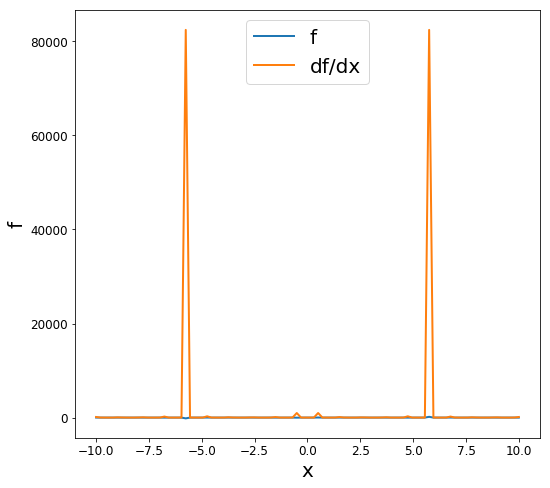

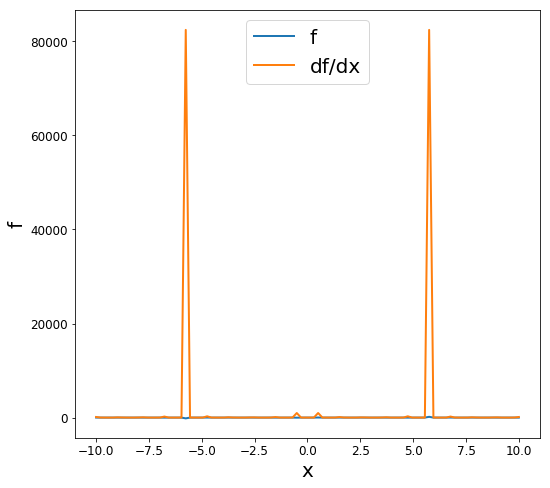

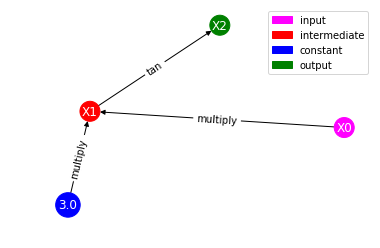

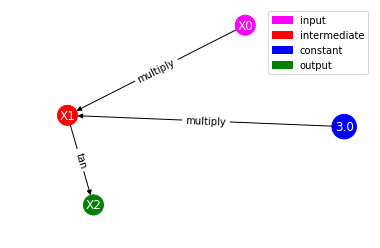

In [7]:
import numpy as np
from AD20.ADnum import ADnum
from AD20 import ADmath as ADmath
from AD20 import ADgraph


import math
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from pandastable import Table
#function_expression = ""#Although looks a little bit redundant, but we have to keep this one since we should not show ADnum on cursor
master = tk.Tk()
master.title("AutoDiff Calculator")
master.geometry("400x900")

def instruction():
    text = "This calculator performs basic calculations and generates functions of a single variable. \n \n" +\
    "Use the buttons below to define your function.  The magenta X is the input variable. \n \n" +\
    "All of the special functions should use standard calculator syntax.  For example, to define the sine of X:" +\
    "press \'sin\', press \'(\', and then press \')\'.  To define x squared:" +\
    "press \'X\', press \'pow\', press \'(\', press '2', and press press \')\'. \n \n" +\
    "When you are done defining your function, press \'Calculate\' to get the result.  Press \'Clear All\' to start over."
    messagebox.showinfo("Welcome to AutoDiff Education Mode",text)

def versionInfo():
    messagebox.showinfo("Welcome to AutoDiff Education Mode","AD20 version 1.0")
##master button
button_instruction = tk.Button(master, text = "Instructions",fg = "Orange",command = instruction)
button_instruction.place(relx=0.5, rely=0.05,anchor=tk.CENTER)

#button_version = tk.Button(master, text = "Check Version", command = versionInfo)
#button_version.pack(side = 'top')

#===End of master configuration


#===Tool box for global variables
function_expression = ""#Although looks a little bit redundant, but we have to keep this one since we should not show ADnum on cursor
function_output = lambda x: 0
func_content = tk.StringVar()
#====End of global variables set===

#===Block for Graph top level window===

def graph_window(master):
    def show_plot():
        plot_window = tk.Toplevel(graph_window)
        plot_window.title("Function and derivative plot")
        plot_window.geometry("600x600")

        fig = ADgraph.plot_ADnum(function_output)
        canvas = FigureCanvasTkAgg(fig, master=plot_window)  # A tk.DrawingArea.
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        toolbar = NavigationToolbar2Tk(canvas, plot_window)
        toolbar.update()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    
    def graph_instructions():
        text = "Use this window to visualize your function and how automatic differentiation is performed on it.\n \n" +\
        "Press \'Draw plot\' to generate a plot of f and its derivative. \n" +\
        "Type a number into the box to set a value for the input variable x.  Press \'Enter\' to calculate the value and" +\
        " derivative of your function at x. \n \n" +\
        "Press \'Computational Graph\' to see the computational graph used to calculate f and its derivative, and press" +\
        "\'Evaluation Table\' to see the corresponding table of function traces."
        messagebox.showinfo('Visualize Function Computations', text)
        
    graph_window = tk.Toplevel(master)
    graph_window.geometry("275x400")
    graph_window.title("Graph Generator")
    global function_output
    instruction_graph = tk.Button(graph_window, text = 'Instructions',fg = "Orange",command = graph_instructions).grid(row = 0, column = 0, columnspan = 3)


    show_plot = tk.Button(graph_window, text = "Draw plot", height = 3, width = 20, command = show_plot).grid(row = 1, column = 0, columnspan = 3)
    value = tk.DoubleVar()
    def draw_graph():
        plot_graph = tk.Toplevel(graph_window)
        plot_graph.title("Computational Graph")
        plot_graph.geometry("600x600")
        fig = ADgraph.draw_graph(function_output(ADnum(value.get(), der=1)))
        canvas = FigureCanvasTkAgg(fig, master=plot_graph)  # A tk.DrawingArea.
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
        canvas.draw()
        toolbar = NavigationToolbar2Tk(canvas, plot_graph)
        toolbar.update()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    def draw_table():
        plot_graph2 = tk.Toplevel(graph_window)
        plot_graph2.title("Computational Table")
        plot_graph2.geometry("600x600")
#         fig = ADgraph.gen_table(function_output)
        
        
        
        f = tk.Frame(plot_graph2)
        f.pack(side=tk.TOP,fill=tk.BOTH,expand=1)
        df = ADgraph.gen_table(function_output(ADnum(value.get(), der=1)))
        table = pt = Table(f, dataframe=df,
                                showtoolbar=True, showstatusbar=True)
        pt.show()
    value_prompt = tk.Label(graph_window, text = "  Evaluate at x = ",height = 3, width = 10).grid(row = 2, column = 0)
    enter_value = tk.Entry(graph_window, textvariable = value, width = 10).grid(row = 2, column = 1)

    def display():
        if not (type(value.get())==float):
            messagebox.showerror('Error', 'Please enter a numeric value for x.')
        show_value = tk.Label(graph_window, text = str(function_output(ADnum(value.get(), der=1)).val),height = 3, width = 20).grid(row = 4, column = 1, columnspan = 2)
        show_derivatice = tk.Label(graph_window, text = str(function_output(ADnum(value.get(), der=1)).der),height = 3, width = 20).grid(row = 5, column = 1, columnspan = 2)
    result_val = tk.Label(graph_window, text = "Value:",height = 3, width = 10).grid(row =4, column =0)
    result_der = tk.Label(graph_window, text= "Derivative: ",height = 3, width = 10).grid(row = 5, column = 0)
    
    enter_button = tk.Button(graph_window, text = "Enter", height = 3, width = 20, command = display).grid(row = 3, column = 0, columnspan = 3)
    eval_prompt = tk.Button(graph_window, text = "Computational Graph",height = 3, width = 20, command = draw_graph).grid(row = 6, column = 0,columnspan = 3)
    table_prompt = tk.Button(graph_window, text = "Evaluation Table",height = 3, width = 20, command = draw_table).grid(row = 7, column = 0,columnspan = 3)

#===Block for Error message====
def error_window():
    error_window = tk.Toplevel(master)
    error_window.title("Error!")
    error_message = tk.Label(error_window, text = "Invalid expression! Please start over and try again!")
    error_message.pack(side = 'top')
#=====Function for master configuration's buttons======
def var_number():
    edit_func("x")
    global function_expression
    function_expression +='x'#'ADnum(x, der = 1)'
def add():
    edit_func("+")
    global function_expression
    function_expression +='+'

def sub():
    edit_func("-")
    global function_expression
    function_expression +='-'

def mul():
    edit_func("*")
    global function_expression
    function_expression +='*'

def div():
    edit_func("/")
    global function_expression
    function_expression +='/'
    
def num_0():
    edit_func("0")
    global function_expression
    function_expression +='0'
def num_1():
    edit_func("1")
    global function_expression
    function_expression +='1'
def num_2():
    edit_func("2")
    global function_expression
    function_expression +='2'
def num_3():
    edit_func("3")
    global function_expression
    function_expression += '3'
def num_4():
    edit_func("4")
    global function_expression
    function_expression += '4'
def num_5():
    edit_func("5")
    global function_expression
    function_expression += '5'
def num_6():
    edit_func("6")
    global function_expression
    function_expression += '6'
def num_7():
    edit_func("7")
    global function_expression
    function_expression += '7'
def num_8():
    edit_func("8")
    global function_expression
    function_expression += '8'
def num_9():
    edit_func("9")
    global function_expression
    function_expression += '9'
def num_dot():
    edit_func(".")
    global function_expression
    function_expression += '.'
#===Add more functions to the added buttons===
def sin():
    edit_func("sin")
    global function_expression
    function_expression += 'ADmath.sin'
def cos():
    edit_func("cos")
    global function_expression
    function_expression += 'ADmath.cos'
def tan():
    edit_func("tan")
    global function_expression
    function_expression += 'ADmath.tan'
def exp():
    edit_func("exp")
    global function_expression
    function_expression += 'ADmath.exp'
def log():
    edit_func("log")
    global function_expression
    function_expression += 'ADmath.log'
def pow_to():
    edit_func("pow")
    global function_expression
    function_expression += '**'
def sqrt():
    edit_func("sqrt")
    global function_expression
    function_expression += 'ADmath.sqrt'
def right_par():
    edit_func("(")
    global function_expression
    function_expression += '('
def left_par():
    edit_func(")")
    global function_expression
    function_expression += ")"
#====End of Function of master buttons
    

def clear_all():
    func_content.set("")
    global function_expression 
    function_expression = " "
    global function_output
    function_output = lambda x :0
    
def confirm():
    global function_expression
    global function_output
#     function_output = lambda x: eval(function_expression)
#     graph_window(master)
    try:
        function_output = lambda x: eval(function_expression)
#         graph_window(master)
    except:
#         error_window(master)
#         raise exception("expression error")
        messagebox.showinfo("Error","Syntax error in your expression, please try again.")
    try:
        textVal = function_output(ADnum(5, der =1)).val
        textDer = function_output(ADnum(5, der=1)).der
        messagebox.showinfo("Continue","Your input is a function. Please continue to draw graphs.")
        graph_window(master)
    except AttributeError:
        messagebox.showinfo("Constant result:","The value is {}".format(function_output(1)))
    except SyntaxError:
        messagebox.showerror("Error", "Syntax error in your expression.  Please use \'Clear All\', and try again.")

        
def edit_func(text):
    content = func_content.get()+text
    func_content.set(content)

##Set up button 
cal_frame = tk.Frame(master,height=32, width=32)
cal_frame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

#===Add Buttons =====
button_sin = tk.Button(cal_frame, text = "sin", font=('wasy10', 20),height=2, width=5,command = sin).grid(row = 1, column = 0)
button_cos = tk.Button(cal_frame, text = "cos", font=('wasy10', 20),height=2, width=5,command = cos).grid(row = 1, column = 1)
button_tan = tk.Button(cal_frame, text = "tan", font=('wasy10', 20),height=2, width=5,command = tan).grid(row = 1, column = 2)
button_exp = tk.Button(cal_frame, text = "exp", font=('wasy10', 20),height=2, width=5,command = exp).grid(row = 1, column = 3) 
button_log = tk.Button(cal_frame, text = "log", font=('wasy10', 20),height=2, width=5,command = log).grid(row = 1, column = 4) 
button_pow = tk.Button(cal_frame, text = "pow", font=('wasy10', 20),height=2, width=5,command = pow_to).grid(row = 2, column = 4)
button_sqrt = tk.Button(cal_frame, text = "sqrt", font=('wasy10', 20),height=2, width=5,command = sqrt).grid(row = 3, column =4)
button_rightPar = tk.Button(cal_frame, text = "(", font=('wasy10', 20),height=2, width=5,command = right_par).grid(row = 4, column =4)
button_leftPar = tk.Button(cal_frame, text = ")", font=('wasy10', 20),height=2, width=5,command = left_par).grid(row = 5, column =4)
#=====Add Buttons End
show_function = tk.Label(cal_frame, text = "f(x) = ").grid(row = 0, column = 0)

button_x = tk.Button(cal_frame, text = "x", font=('wasy10', 20),fg = "magenta",height=2, width=5,command = var_number).grid(row = 5, column =2)

button_add = tk.Button(cal_frame, text = '+', font=('wasy10', 20),height=2, width=5,command = add).grid(row = 2, column = 3) # can add command

button_sub = tk.Button(cal_frame, text = "-",font=('wasy10', 20),height=2, width=5,command = sub).grid(row = 3, column = 3)

button_mul = tk.Button(cal_frame, text = "*",font=('wasy10', 20),height=2, width=5,command = mul).grid(row = 4, column = 3)

button_div = tk.Button(cal_frame, text = "/",font=('wasy10', 20),height=2, width=5,command = div).grid(row = 5, column = 3)

button_0 = tk.Button(cal_frame, text = "0",font=('wasy10', 20),height=2, width=5,command = num_0).grid(row = 5, column = 0)

button_1 = tk.Button(cal_frame, text = "1",font=('wasy10', 20),height=2, width=5,command = num_1).grid(row = 4, column = 0)

button_2 = tk.Button(cal_frame, text = "2",font=('wasy10', 20),height=2, width=5,command = num_2).grid(row = 4, column = 1)

button_3 = tk.Button(cal_frame, text = "3",font=('wasy10', 20),height=2, width=5,command = num_3).grid(row = 4, column = 2)

button_4 = tk.Button(cal_frame, text = "4",font=('wasy10', 20),height=2, width=5,command = num_4).grid(row = 3, column = 0)

button_5 = tk.Button(cal_frame, text = "5",font=('wasy10', 20),height=2, width=5,command = num_5).grid(row = 3, column = 1)

button_6 = tk.Button(cal_frame, text = "6",font=('wasy10', 20),height=2, width=5,command = num_6).grid(row = 3, column = 2)

button_7 = tk.Button(cal_frame, text = "7",font=('wasy10', 20),height=2, width=5,command = num_7).grid(row = 2, column = 0)

button_8 = tk.Button(cal_frame, text = "8",font=('wasy10', 20),height=2, width=5,command = num_8).grid(row = 2, column = 1)

button_9 = tk.Button(cal_frame, text = "9",font=('wasy10', 20),height=2, width=5,command = num_9).grid(row = 2, column = 2)

button_dot = tk.Button(cal_frame, text = ".",font=('wasy10', 20),height=2, width=5,command = num_dot).grid(row = 5, column = 1)

button_confirm = tk.Button(cal_frame, text = "Calculate",font=('wasy10', 20),height=2, width=22,command = confirm).grid(row = 6, columnspan =8)

button_clearAll = tk.Button(cal_frame, text = "Clear All",font=('wasy10', 20),height=2, width=22,command = clear_all).grid(row = 7,columnspan =8)

show_func = tk.Label(cal_frame, textvariable = func_content,height=3, width=30,bg = 'Seashell').grid(row = 0,column = 1,columnspan =7)


#=====End of configuration========
master.resizable(width=True, height=True)
master.mainloop()